Preview of your dataset:
   num_links  num_attachments  sender_reputation is_spam
0          1                2           0.188025      no
1          4                1           0.355385      no
2          3                4           0.783792      no
3          2                4           0.554227      no
4          6                1           0.005230      no

Missing values in your dataset:
num_links            0
num_attachments      0
sender_reputation    0
is_spam              0
dtype: int64

Model Evaluation:
Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

          no       0.56      0.45      0.50        11
         yes       0.45      0.56      0.50         9

    accuracy                           0.50        20
   macro avg       0.51      0.51      0.50        20
weighted avg       0.51      0.50      0.50        20


Confusion Matrix:
 [[5 6]
 [4 5]]


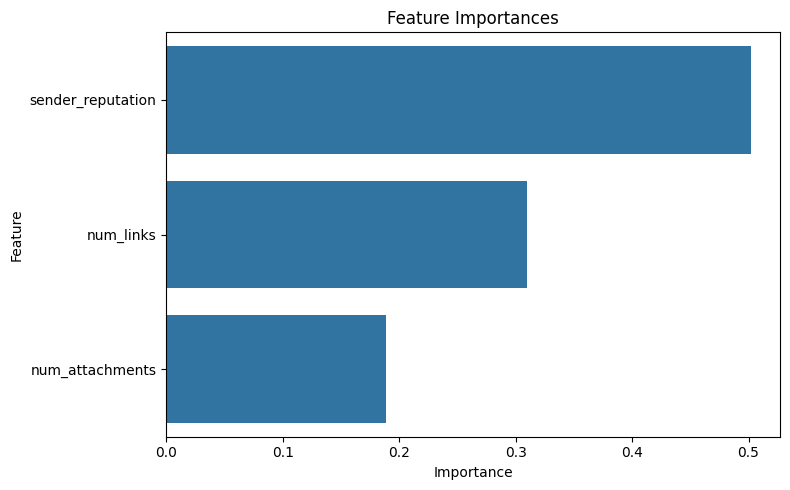

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file directly from your local file system
df = pd.read_csv('spam_emails.csv')  # Make sure this file is in the same directory

# Display the first few rows
print("Preview of your dataset:")
print(df.head())

# Check for any missing values
print("\nMissing values in your dataset:")
print(df.isnull().sum())

# Split into features and target
X = df.drop('is_spam', axis=1)  # 'spam' should be your target column
y = df['is_spam']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot feature importances
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
